In [62]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten,Input,Reshape, concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM,Conv1DTranspose,UpSampling1D,AveragePooling1D
from tensorflow.keras.models import model_from_json
from tensorflow.keras import backend as K 
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,precision_score,recall_score
# from sklearn.decomposition import KernelPCA,PCA
# from sklearn.preprocessing import StandardScaler
from time import time

import pickle
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam
# from keras import layers
from tensorflow.keras.models import Sequential 
# from focal_loss import binary_focal_loss
# from sklearn.metrics import roc_auc_score, roc_curve
# from sklearn.model_selection import KFold 
# import xai.xai as xai
# import xai.xai.data
import shap
import tensorflow as tf
# import numpy as np
# import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
tf.__version__

'2.4.0'

In [63]:
df=pd.read_csv("dataset_0-32000_1-25000.csv")

In [64]:
df.head()

,Unnamed: 0,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,...,Phosphate,Potassium,Hct,Hgb,PTT,WBC,Platelets,Age,SepsisLabel,SIRS
0,0,80.147727,97.295455,37.080909,106.068182,59.924318,39.641932,16.625000,-0.022727,25.590909,...,3.415909,4.229545,27.227273,9.212500,28.675000,12.561364,248.795455,77.0,0.0,1.0
1,1,80.867647,97.338235,36.910294,99.294118,62.132647,44.860294,17.426471,-0.514706,25.794118,...,3.385294,4.238235,29.480882,9.967647,43.573529,11.250000,118.676471,79.0,0.0,0.0
2,2,89.638889,97.583333,37.046667,120.194444,77.648333,54.069722,19.916667,5.666667,30.944444,...,3.861111,4.133333,31.594444,10.761111,30.366667,13.483333,406.333333,81.0,0.0,1.0
3,3,81.391892,97.662162,36.869730,114.587838,84.567748,67.534054,19.108108,-0.756757,23.621622,...,2.948649,3.951351,33.808108,11.640541,72.045946,9.929730,153.864865,57.0,0.0,0.0
4,4,98.000000,97.473684,37.222632,110.657895,74.948421,57.816842,20.894737,0.710526,24.157895,...,3.231579,4.126316,28.336842,9.352632,34.463158,18.244737,615.157895,28.0,0.0,3.0


In [65]:
df=df.drop('Unnamed: 0',axis=1)
df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,...,Phosphate,Potassium,Hct,Hgb,PTT,WBC,Platelets,Age,SepsisLabel,SIRS
0,80.147727,97.295455,37.080909,106.068182,59.924318,39.641932,16.625000,-0.022727,25.590909,0.526136,...,3.415909,4.229545,27.227273,9.212500,28.675000,12.561364,248.795455,77.0,0.0,1.0
1,80.867647,97.338235,36.910294,99.294118,62.132647,44.860294,17.426471,-0.514706,25.794118,0.576471,...,3.385294,4.238235,29.480882,9.967647,43.573529,11.250000,118.676471,79.0,0.0,0.0
2,89.638889,97.583333,37.046667,120.194444,77.648333,54.069722,19.916667,5.666667,30.944444,0.583333,...,3.861111,4.133333,31.594444,10.761111,30.366667,13.483333,406.333333,81.0,0.0,1.0
3,81.391892,97.662162,36.869730,114.587838,84.567748,67.534054,19.108108,-0.756757,23.621622,0.467568,...,2.948649,3.951351,33.808108,11.640541,72.045946,9.929730,153.864865,57.0,0.0,0.0
4,98.000000,97.473684,37.222632,110.657895,74.948421,57.816842,20.894737,0.710526,24.157895,0.513158,...,3.231579,4.126316,28.336842,9.352632,34.463158,18.244737,615.157895,28.0,0.0,3.0


In [66]:
df.SepsisLabel.value_counts()

0.0    32000
1.0    25000
Name: SepsisLabel, dtype: int64

In [67]:
X=df.drop('SepsisLabel',axis=1)
y=df['SepsisLabel']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,stratify=y)

In [90]:
X_train_selected=X_train[['FiO2', 'O2Sat', 'Magnesium', 'SaO2', 'Lactate', 'pH', 'BaseExcess','Potassium',
                          'Temp', 'Calcium', 'Phosphate', 'Creatinine', 'Chloride','HCO3', 'Resp', 'Hgb', 'Hct', 'BUN','SIRS']]
X_test_selected=X_test[['FiO2', 'O2Sat', 'Magnesium', 'SaO2', 'Lactate', 'pH', 'BaseExcess','Potassium',
                        'Temp', 'Calcium', 'Phosphate', 'Creatinine', 'Chloride','HCO3', 'Resp', 'Hgb', 'Hct', 'BUN','SIRS']]

In [91]:
y_train.value_counts(),y_test.value_counts()

(0.0    25600
 1.0    20000
 Name: SepsisLabel, dtype: int64,
 0.0    6400
 1.0    5000
 Name: SepsisLabel, dtype: int64)

In [92]:
X_train_selected.shape

(45600, 19)

In [93]:
y_test[:5]

27900    0.0
54973    1.0
7023     0.0
31088    0.0
15547    0.0
Name: SepsisLabel, dtype: float64

In [94]:
X_test.iloc[0,:]

HR             79.095238
O2Sat          96.809524
Temp           36.821905
SBP           172.511905
MAP            97.714286
DBP            61.761905
Resp           21.023810
BaseExcess     -1.190476
HCO3           20.857143
FiO2            0.547619
pH              7.395714
PaCO2          37.095238
SaO2           97.285714
BUN            45.285714
Calcium         8.309524
Chloride      106.619048
Creatinine      2.290476
Glucose       148.380952
Lactate         2.019048
Magnesium       2.128571
Phosphate       4.019048
Potassium       4.357143
Hct            29.833333
Hgb             9.945238
PTT            31.066667
WBC             9.204762
Platelets     129.142857
Age            64.000000
SIRS            1.000000
Name: 27900, dtype: float64

In [95]:
X_test.iloc[1,:]

HR            121.457646
O2Sat          98.171373
Temp           39.418358
SBP           142.142485
MAP           101.856863
DBP            81.628366
Resp           20.542354
BaseExcess      1.771503
HCO3           25.885752
FiO2            0.488575
pH              7.397715
PaCO2          45.000000
SaO2           96.228497
BUN             2.456994
Calcium         8.159948
Chloride      102.799739
Creatinine      0.888575
Glucose       110.971764
Lactate         1.262771
Magnesium       2.222850
Phosphate       2.179974
Potassium       3.879974
Hct            31.159817
Hgb            10.197046
PTT            47.803737
WBC            13.251738
Platelets     171.000000
Age            20.000000
SIRS            4.000000
Name: 54973, dtype: float64

In [96]:
minmax = MinMaxScaler()
minmax.fit(X_train_selected)
X_test_selected_scaled=minmax.transform(X_test_selected)

In [97]:
minmax = pickle.load(open('minmax_for_autoencoder.pkl','rb'))
X_train_selected_scaled=minmax.transform(X_train_selected)
X_test_selected_scaled=minmax.transform(X_test_selected)

Trying to unpickle estimator MinMaxScaler from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations


In [167]:
X_train_selected_scaled.shape,X_test_selected_scaled.shape

((45600, 19), (11400, 19))

In [98]:
# X_train_selected_scaled_cnn=X_train_selected_scaled.reshape(45600, 19,1)
X_test_selected_scaled_cnn=X_test_selected_scaled.reshape(11400, 19,1)
# print("Train shape for CNN: ",X_train_selected_scaled_cnn.shape)
print("Test shape for CNN: ",X_test_selected_scaled_cnn.shape)

Test shape for CNN:  (11400, 19, 1)


## AutoEncoder by CNN Encoder and CNN Decoder

In [15]:
input_dim = Input(shape = (19, 1))

# cnn_enc=Sequential()
cnn_enc = layers.Conv1D(64, 19, activation='relu', padding='same')(input_dim)
cnn_enc = layers.Conv1D(32, 19, activation='relu', padding='same')(cnn_enc)
cnn_enc = layers.Conv1D(16, 19, activation='relu', padding='same')(cnn_enc)
cnn_enc = layers.Flatten()(cnn_enc)

bottleneck = Dense(11, activation='sigmoid')(cnn_enc)

reshp= Reshape((11,1))(bottleneck)

cnn_dec=layers.Conv1D(16, 11, activation='relu',padding='same')(reshp)
cnn_dec=layers.Conv1D(32, 11, activation='relu',padding='same')(cnn_dec)
cnn_dec=layers.Conv1D(64, 11, activation='relu',padding='same')(cnn_dec)

dec_flat=layers.Flatten()(cnn_dec)

mlp=Dense(256,activation='relu')(dec_flat)
mlp=Dense(19,activation='relu')(mlp)

autoencoder_cnn_cnn = keras.Model(input_dim, mlp)

print(autoencoder_cnn_cnn.summary())

###### Imp Model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 19, 64)            1280      
                                                                 
 conv1d_1 (Conv1D)           (None, 19, 32)            38944     
                                                                 
 conv1d_2 (Conv1D)           (None, 19, 16)            9744      
                                                                 
 flatten (Flatten)           (None, 304)               0         
                                                                 
 dense (Dense)               (None, 11)                3355      
                                                                 
 reshape (Reshape)           (None, 11, 1)             0     

### GRAD Cam

In [16]:
def grad_cam(layer_name, data, autoenc, classifa, C_mod=True):
    model1=autoenc
    if C_mod==True:
        model1==classifa
        
    grad_model = tf.keras.models.Model([autoenc.inputs], [model1.get_layer(layer_name).output,
                                                          classifa.output])
    weights_list=model.get_weights()
#     grad_model.set_weights(weights_list[0:10])
    last_conv_layer_output, preds = grad_model(data)

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(data)
        pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads, axis=(0))

    last_conv_layer_output = last_conv_layer_output[0]

    heatmap = last_conv_layer_output * pooled_grads
    heatmap = tf.reduce_mean(heatmap, axis=(1))
    heatmap = np.expand_dims(heatmap,0)
    return grad_model, heatmap


In [17]:
# data

In [18]:
with tf.GradientTape() as tape:
    last_conv_layer_output, preds = grad_model(data)
    pred_index = tf.argmax(preds[0])
    class_channel = preds[:, pred_index]

grads = tape.gradient(class_channel, last_conv_layer_output)

pooled_grads = tf.reduce_mean(grads, axis=(0))

last_conv_layer_output = last_conv_layer_output[0]

heatmap = last_conv_layer_output * pooled_grads
# heatmap = tf.reduce_mean(heatmap, axis=(1))
# heatmap = np.expand_dims(heatmap,0)

NameError: name 'grad_model' is not defined

In [ ]:
class_channel

In [ ]:
last_conv_layer_output.shape

In [ ]:
heatmap.shape

In [ ]:
grads.shape

In [ ]:
last_conv_layer_output, preds = grad_model(data)

In [ ]:
last_conv_layer_output.shape

In [ ]:
preds.shape

In [ ]:
heatmap

In [ ]:
layer_name = "conv1d"
overall_heatmap_for_training=[]
for i in X_train_selected_scaled_cnn:
    data = np.expand_dims(i,0)
    heatmap = grad_cam('conv1d_1','dense',data,autoencoder_cnn_cnn2)
    overall_heatmap_for_training.append(heatmap)
#     plt.figure(figsize=(30,4))
#     plt.imshow(np.expand_dims(heatmap,axis=2),cmap='Reds', aspect="auto", interpolation='nearest', alpha=0.7)
# #         plt.plot(i,'k')
#     plt.colorbar()
#     plt.show()
#     print(heatmap)
#     print(heatmap.shape)


In [ ]:
autoencoder_cnn_cnn.compile(optimizer='adam', loss='mse',metrics=['accuracy','mae','MeanSquaredError'])

In [ ]:
# autoencoder_cnn_cnn.fit(X_train_selected_scaled_cnn,X_train_selected_scaled,epochs=100,validation_split=0.2,verbose=2)

In [ ]:
# autoencoder_cnn_cnn.history.history.keys()

In [ ]:
# plt.plot(autoencoder_cnn_cnn.history.history['accuracy'])
# plt.plot(autoencoder_cnn_cnn.history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='lower right')
# plt.show()

In [ ]:
autoencoder_cnn_cnn.summary()

In [ ]:
# plt.plot(autoencoder_cnn_cnn.history.history['loss'])
# plt.plot(autoencoder_cnn_cnn.history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('Loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='lower right')
# plt.show()

In [ ]:
# intermediate_layer_model = Model(inputs=autoencoder_cnn_cnn.input, outputs=autoencoder_cnn_cnn.get_layer(index=5).output)
# X_train_autoencoder_cnn_cnn_11_1 = intermediate_layer_model.predict(X_train_selected_scaled_cnn)
# X_test_autoencoder_cnn_cnn_11_1 = intermediate_layer_model.predict(X_test_selected_scaled_cnn)
# print("Shape of train: ",X_train_autoencoder_cnn_cnn_11_1.shape)
# print("Shape of train: ",X_test_autoencoder_cnn_cnn_11_1.shape)

In [ ]:
ann_cnn_cnn1 = keras.Sequential([
    keras.layers.Dense(128, input_shape=(11,), activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ann_cnn_cnn1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

ann_cnn_cnn1.fit(X_train_autoencoder_cnn_cnn_11_1, y_train, epochs=60,validation_split=0.25)

pred=ann_cnn_cnn1.predict(X_test_autoencoder_cnn_cnn_11_1)
pred1=[]
for j in pred:
    if j[0]>=0.5:
        pred1.append(1)
    else:
        pred1.append(0)
        
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

In [ ]:
[[5835  565]
 [ 284 4716]]

In [ ]:
### New archietecture of the previous model

In [ ]:
input_dim = Input(shape = (19, 1))

# cnn_enc=Sequential()
cnn_enc = layers.Conv1D(64, 19, activation='relu', padding='same')(input_dim)
cnn_enc = layers.Conv1D(32, 19, activation='relu', padding='same')(cnn_enc)
cnn_enc = layers.Conv1D(16, 19, activation='relu', padding='same')(cnn_enc)
cnn_enc = layers.Conv1D(8, 19, activation='relu', padding='same')(cnn_enc)
cnn_enc = layers.Flatten()(cnn_enc)

bottleneck = Dense(11, activation='sigmoid')(cnn_enc)

reshp= Reshape((11,1))(bottleneck)

cnn_dec=layers.Conv1D(8, 11, activation='relu',padding='same')(reshp)
cnn_dec=layers.Conv1D(16, 11, activation='relu',padding='same')(cnn_dec)
cnn_dec=layers.Conv1D(32, 11, activation='relu',padding='same')(cnn_dec)
cnn_dec=layers.Conv1D(64, 11, activation='relu',padding='same')(cnn_dec)

dec_flat=layers.Flatten()(cnn_dec)

# mlp=Dense(256,activation='relu')(dec_flat)
mlp=Dense(19,activation='relu')(dec_flat)

autoencoder_cnn_cnn1 = keras.Model(input_dim, mlp)

print(autoencoder_cnn_cnn1.summary())


In [ ]:
autoencoder_cnn_cnn1.compile(optimizer='adam', loss='mse',metrics=['accuracy','mae','MeanSquaredError'])

In [ ]:
autoencoder_cnn_cnn1.fit(X_train_selected_scaled_cnn,X_train_selected_scaled,epochs=100,validation_split=0.2,verbose=2)

In [ ]:
plt.plot(autoencoder_cnn_cnn1.history.history['accuracy'])
plt.plot(autoencoder_cnn_cnn1.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
plt.plot(autoencoder_cnn_cnn1.history.history['loss'])
plt.plot(autoencoder_cnn_cnn1.history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
intermediate_layer_model1 = Model(inputs=autoencoder_cnn_cnn1.input, outputs=autoencoder_cnn_cnn1.get_layer(index=6).output)
X_train_autoencoder_cnn_cnn_11_2 = intermediate_layer_model1.predict(X_train_selected_scaled_cnn)
X_test_autoencoder_cnn_cnn_11_2 = intermediate_layer_model1.predict(X_test_selected_scaled_cnn)
print("Shape of train: ",X_train_autoencoder_cnn_cnn_11_2.shape)
print("Shape of train: ",X_test_autoencoder_cnn_cnn_11_2.shape)

In [ ]:
ann_cnn_cnn1 = keras.Sequential([
    keras.layers.Dense(128, input_shape=(11,), activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ann_cnn_cnn1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

ann_cnn_cnn1.fit(X_train_autoencoder_cnn_cnn_11_2, y_train, epochs=60,validation_split=0.25)

pred1=ann_cnn_cnn1.predict(X_test_autoencoder_cnn_cnn_11_2)
pred2=[]
for j in pred1:
    if j[0]>=0.5:
        pred2.append(1)
    else:
        pred2.append(0)
        
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

# Main model

In [ ]:
#### Since there is not such significant difference in the last model after removing one dense layer we are sticking with the 
# first model only and using other loss functions to see the change

### As we are shrinking the layers before and after bottleneck slight misclassification taking place that is lowering the recall

# Another Architecture

In [6]:
input_dim = Input(shape = (19, 1))

# cnn_enc=Sequential()
cnn_enc = layers.Conv1D(128, 19, activation='relu', padding='same')(input_dim)
cnn_enc = layers.Conv1D(64, 19, activation='relu', padding='same')(cnn_enc)
cnn_enc = layers.Conv1D(32, 19, activation='relu', padding='same')(cnn_enc)
cnn_enc = layers.Conv1D(16, 19, activation='relu', padding='same')(cnn_enc)
cnn_enc = layers.Flatten()(cnn_enc)

bottleneck = Dense(11, activation='sigmoid')(cnn_enc)

reshp= Reshape((11,1))(bottleneck)

cnn_dec=layers.Conv1D(16, 11, activation='relu',padding='same')(reshp)
cnn_dec=layers.Conv1D(32, 11, activation='relu',padding='same')(cnn_dec)
cnn_dec=layers.Conv1D(64, 11, activation='relu',padding='same')(cnn_dec)
cnn_dec=layers.Conv1D(128, 11, activation='relu',padding='same')(cnn_dec)

dec_flat=layers.Flatten()(cnn_dec)

# mlp=Dense(256,activation='relu')(dec_flat)
mlp=Dense(19,activation='relu')(dec_flat)

autoencoder_cnn_cnn2 = keras.Model(input_dim, mlp)

print(autoencoder_cnn_cnn2.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 19, 1)]           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 19, 128)           2560      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 19, 64)            155712    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 19, 32)            38944     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 19, 16)            9744      
_________________________________________________________________
flatten (Flatten)            (None, 304)               0         
_________________________________________________________________
dense (Dense)                (None, 11)                3355  

In [ ]:
autoencoder_cnn_cnn2.compile(optimizer='adam', loss='mse',metrics=['accuracy','mae','MeanSquaredError'])

In [ ]:
autoencoder_cnn_cnn2.fit(X_train_selected_scaled_cnn,X_train_selected_scaled,epochs=100,validation_split=0.2,verbose=2)

In [3]:
import os

In [4]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# # Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1)

# # Train the model with the new callback
# autoencoder_cnn_cnn2.fit(X_train_selected_scaled_cnn, X_train_selected_scaled, epochs=1,validation_split=0.2, verbose=2, 
#           callbacks=[cp_callback])  # Pass callback to training

In [7]:
autoencoder_cnn_cnn2.load_weights(checkpoint_path)

In [ ]:
for layer in autoencoder_cnn_cnn2.layers:
    print(layer.name)

In [ ]:
# Keep the trainable layers only
layer_names=['conv1d_6', 'conv1d_7', 'conv1d_8', 'conv1d_9']

In [ ]:
layer_with_heatmap_dict={}
for layer in layer_names:
    overall_heatmap_for_training=[]
    for i in X_train_selected_scaled_cnn:
        data = np.expand_dims(i,0)
        heatmap = grad_cam(layer,'dense',data,autoencoder_cnn_cnn2)
        overall_heatmap_for_training.append(heatmap)
    layer_with_heatmap_dict[layer]=overall_heatmap_for_training
    print("heatmaps stored for ",layer)

In [ ]:
np.array(layer_with_heatmap_dict["conv1d_3"]).reshape(45600,19).shape

In [ ]:
for key,value in layer_with_heatmap_dict.items():
    heatmap=np.array(layer_with_heatmap_dict[key]).reshape(45600,19)
    heatmap=np.average(heatmap,axis=0).reshape(1,19)
    print("for ",key," heatmap shape ",heatmap.shape)
    plt.figure(figsize=(10,2))
    plt.imshow(np.expand_dims(heatmap,axis=2),cmap='Reds', aspect="auto", interpolation='nearest', alpha=0.7)
#         plt.plot(i,'k')
    plt.colorbar()
    plt.show()

In [ ]:
lst=[]
for key,value in layer_with_heatmap_dict.items():
    heatmap=np.array(layer_with_heatmap_dict[key]).reshape(45600,19)
    heatmap=np.average(heatmap,axis=0).reshape(1,19)
    lst.append(heatmap[0])
    print("for ",key," heatmap shape ",heatmap)

In [ ]:
heatmap=pd.DataFrame(lst).T
heatmap.columns=['EB1','EB2','EB3','EB4']
heatmap.index=['FiO2', 'O2Sat', 'Magnesium', 'SaO2', 'Lactate', 'pH', 'BaseExcess','Potassium',
                          'Temp', 'Calcium', 'Phosphate', 'Creatinine', 'Chloride','HCO3', 'Resp', 'Hgb', 'Hct', 'BUN','SIRS']
heatmap

In [ ]:
# determining the name of the file
file_name = 'Explain_autoencoder.xlsx'
  
# saving the excel
heatmap.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

In [52]:
intermediate_layer_model11 = Model(inputs=autoencoder_cnn_cnn2.input, outputs=autoencoder_cnn_cnn2.get_layer(index=6).output)
# X_train_autoencoder_cnn_cnn_11_12 = intermediate_layer_model11.predict(X_train_selected_scaled_cnn)
X_test_autoencoder_cnn_cnn_11_12 = intermediate_layer_model11.predict(X_test_selected_scaled_cnn)
# print("Shape of train: ",X_train_autoencoder_cnn_cnn_11_12.shape)
print("Shape of train: ",X_test_autoencoder_cnn_cnn_11_12.shape)

Shape of train:  (11400, 11)


In [ ]:
# KNN
knn=KNeighborsClassifier()
knn.fit(X_train_autoencoder_cnn_cnn_11_12,y_train)
pred=knn.predict(X_test_autoencoder_cnn_cnn_11_12)
print("Accuray: ",accuracy_score(y_test,pred))
print("Precision: ",precision_score(y_test,pred))
print("Recall: ",recall_score(y_test,pred))
print("F1 Score: ",f1_score(y_test,pred))

In [8]:
ann_cnn_cnn2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(11,), activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# ann_cnn_cnn2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
#               loss="binary_crossentropy",
#               metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

# ann_cnn_cnn2.fit(X_train_autoencoder_cnn_cnn_11_12, y_train, epochs=60,validation_split=0.25)

# pred2=ann_cnn_cnn2.predict(X_test_autoencoder_cnn_cnn_11_12)
# pred3=[]
# for j in pred2:
#     if j[0]>=0.5:
#         pred3.append(1)
#     else:
#         pred3.append(0)
        
# print(confusion_matrix(y_test,pred3))
# print(classification_report(y_test,pred3))

In [9]:
ann_cnn_cnn2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               1536      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 51,073
Trainable params: 51,073
Non-trainable params: 0
_________________________________________________________________


In [10]:
import os
checkpoint_path = "training_1_classifier/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
# ann_cnn_cnn2.fit(X_train_autoencoder_cnn_cnn_11_12, y_train, epochs=1,validation_split=0.2, verbose=2, 
#           callbacks=[cp_callback])  # Pass callback to training

In [99]:
ann_cnn_cnn2.load_weights(checkpoint_path)

In [100]:
pred2=ann_cnn_cnn2.predict(X_test_autoencoder_cnn_cnn_11_12)
pred3=[]
for j in pred2:
    if j[0]>=0.5:
        pred3.append(1)
    else:
        pred3.append(0)
        
print(confusion_matrix(y_test,pred3))
print(classification_report(y_test,pred3))

[[3717 2683]
 [2946 2054]]
              precision    recall  f1-score   support

         0.0       0.56      0.58      0.57      6400
         1.0       0.43      0.41      0.42      5000

    accuracy                           0.51     11400
   macro avg       0.50      0.50      0.50     11400
weighted avg       0.50      0.51      0.50     11400



In [57]:
pred3[:5]

[0, 1, 0, 1, 1]

#### SHAP FOR EXPLAINABILTY OF ANN

In [58]:
import tensorflow.keras as keras 
shap.initjs() # you need this so the plots can be displayed

In [101]:
# tf.keras.backend.set_learning_phase(True)
X_train_autoencoder_cnn_cnn_11_12=pd.read_csv("X_train_autoencoder_cnn_cnn_11_12").values
X_test_autoencoder_cnn_cnn_11_12=pd.read_csv("X_test_autoencoder_cnn_cnn_11_12").values
y_train=pd.read_csv("y_train")
y_test=pd.read_csv("y_test")

In [102]:
X_train_autoencoder_cnn_cnn_11_12.shape,X_test_autoencoder_cnn_cnn_11_12.shape

((45600, 11), (11400, 11))

In [103]:
X_test_autoencoder_cnn_cnn_11_12[0]

array([0.52853274, 0.5133255 , 0.46109307, 0.39045468, 0.3537336 ,
       0.4880473 , 0.5183314 , 0.37611005, 0.21346839, 0.35697237,
       0.4456506 ])

### FOR TEST SET

In [104]:
total_shap_list=[]
i,j=0,0
while j<len(pd.read_csv("X_test_autoencoder_cnn_cnn_11_12").values):
    i = j
    j=j+100
    explainer=shap.DeepExplainer(ann_cnn_cnn2, X_test_autoencoder_cnn_cnn_11_12[i:j])
    shap_values_features=explainer.shap_values(X_test_autoencoder_cnn_cnn_11_12[i:j])
    total_shap_list.append(shap_values_features[0])

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [17]:
global_shap_values_xtrain=[]
for lst_item in range(len(total_shap_list)):
    for nd_item in range(len(total_shap_list[lst_item])):
        global_shap_values_xtrain.append(total_shap_list[lst_item][nd_item])

In [18]:
shapley_final_list=[]
shap_np_array=np.array(global_shap_values_xtrain)
shapley_final_list.append(shap_np_array)

In [19]:
shapley_final_list[0].shape

(11400, 11)

In [20]:
abs_lst=abs(shapley_final_list[0])
df_abs=pd.DataFrame(abs_lst)

In [21]:
df_negpos=pd.DataFrame(shapley_final_list[0])

In [25]:
df_abs.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1.140000e+04,11400.000000,11400.000000,11400.000000,11400.000000,11400.000000,11400.000000,11400.000000,11400.000000,1.140000e+04,1.140000e+04
mean,5.317809e-02,0.052604,0.059966,0.069135,0.075645,0.061651,0.082043,0.058130,0.072668,8.329485e-02,4.840491e-02
std,5.557894e-02,0.058961,0.064648,0.075498,0.082642,0.071470,0.090005,0.061638,0.084374,8.264398e-02,5.274315e-02
min,6.316879e-07,0.000009,0.000010,0.000005,0.000007,0.000005,0.000001,0.000017,0.000002,1.755464e-07,7.546212e-07
25%,2.073619e-02,0.017833,0.022615,0.019288,0.026161,0.016553,0.028905,0.024114,0.019310,3.686552e-02,1.872017e-02
50%,3.975959e-02,0.036218,0.042453,0.044598,0.050860,0.038435,0.054913,0.043718,0.040070,6.357497e-02,3.597341e-02
75%,6.418194e-02,0.063692,0.070869,0.091251,0.090259,0.079849,0.097044,0.066239,0.096585,9.467999e-02,5.673239e-02
max,6.123833e-01,0.814555,0.668401,0.831014,0.826838,0.798522,0.886348,0.717607,0.888724,8.218817e-01,6.025542e-01


In [23]:
df_negpos.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1.140000e+04,1.140000e+04,1.140000e+04,1.140000e+04,1.140000e+04,1.140000e+04,1.140000e+04,1.140000e+04,1.140000e+04,1.140000e+04,1.140000e+04
mean,-3.655699e-12,-1.134970e-10,1.887432e-10,1.084614e-10,4.207372e-11,2.724236e-11,1.077882e-10,-4.520130e-11,-8.946499e-11,-7.673305e-11,-1.221499e-11
std,7.692318e-02,7.901796e-02,8.817942e-02,1.023720e-01,1.120373e-01,9.438841e-02,1.217889e-01,8.472700e-02,1.113558e-01,1.173400e-01,7.158967e-02
min,-2.216907e-01,-2.891418e-01,-2.947138e-01,-5.038376e-01,-6.654229e-01,-4.454601e-01,-4.777860e-01,-2.415381e-01,-8.887239e-01,-3.086700e-01,-2.431131e-01
25%,-4.480036e-02,-4.214076e-02,-4.797022e-02,-4.859362e-02,-5.575658e-02,-4.396491e-02,-6.324772e-02,-4.905407e-02,-4.313315e-02,-6.968651e-02,-4.084900e-02
50%,-2.059881e-02,-1.736116e-02,-2.325336e-02,-8.018447e-03,-2.119626e-02,-1.043070e-02,-3.073287e-02,-2.565728e-02,-1.489388e-02,-3.898252e-02,-1.967581e-02
75%,2.112240e-02,1.898854e-02,2.034880e-02,3.773413e-02,3.574713e-02,2.821793e-02,2.366325e-02,2.000498e-02,3.203535e-02,2.930284e-02,1.603534e-02
max,6.123833e-01,8.145551e-01,6.684014e-01,8.310140e-01,8.268379e-01,7.985224e-01,8.863479e-01,7.176074e-01,7.691641e-01,8.218817e-01,6.025542e-01


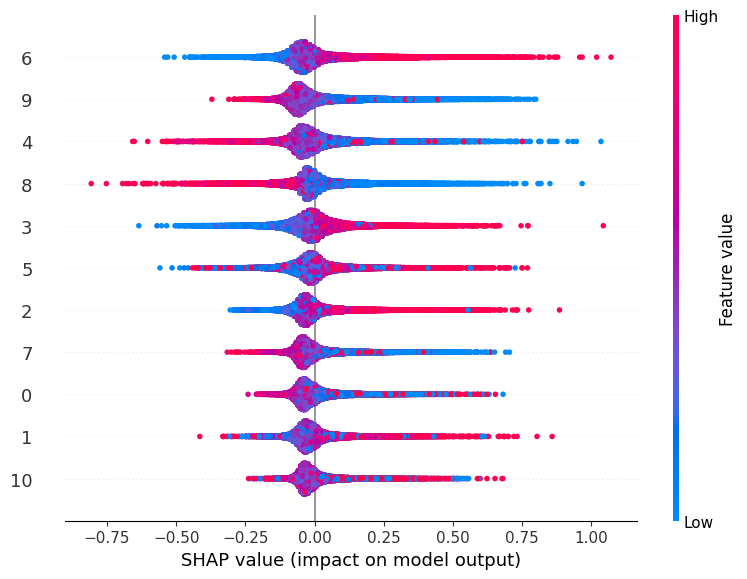

In [94]:
shap.summary_plot(shapley_final_list[0], X_train_autoencoder_cnn_cnn_11_12, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

### FOR TESTING SET

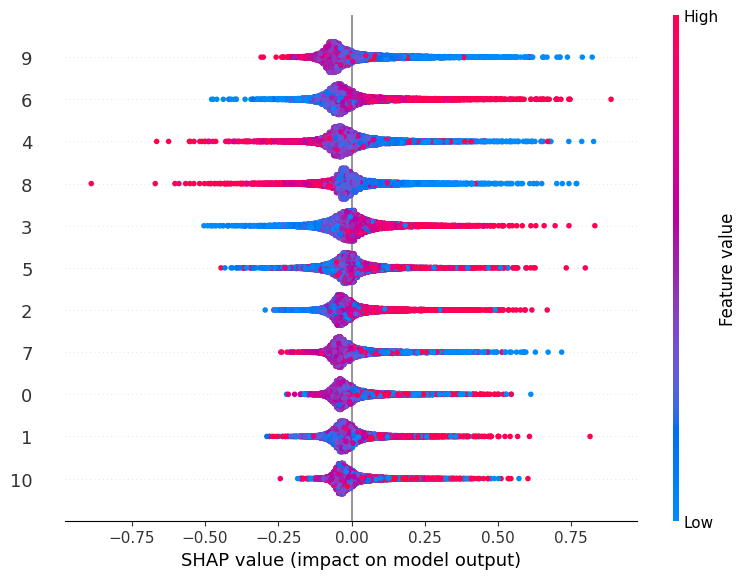

In [97]:
total_shap_list_test=[]
i,j=0,0
while j<len(pd.read_csv("X_test_autoencoder_cnn_cnn_11_12").values):
    i = j
    j=j+100
    explainer=shap.DeepExplainer(ann_cnn_cnn2, X_test_autoencoder_cnn_cnn_11_12[i:j])
    shap_values_features=explainer.shap_values(X_test_autoencoder_cnn_cnn_11_12[i:j])
    total_shap_list_test.append(shap_values_features[0])

global_shap_values_xtest=[]
for lst_item in range(len(total_shap_list_test)):
    for nd_item in range(len(total_shap_list_test[lst_item])):
        global_shap_values_xtest.append(total_shap_list_test[lst_item][nd_item])
        
shapley_final_list_test=[]
shap_np_array1=np.array(global_shap_values_xtest)
shapley_final_list_test.append(shap_np_array1)
shap.summary_plot(shapley_final_list_test[0], X_test_autoencoder_cnn_cnn_11_12, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

In [ ]:
#### Plot waterfall plot for few test instances

In [105]:
# Fits the explainer
explainer = shap.Explainer(ann_cnn_cnn2.predict, X_test_autoencoder_cnn_cnn_11_12)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test_autoencoder_cnn_cnn_11_12)

Permutation explainer: 11401it [2:36:29,  1.21it/s]                                                                    


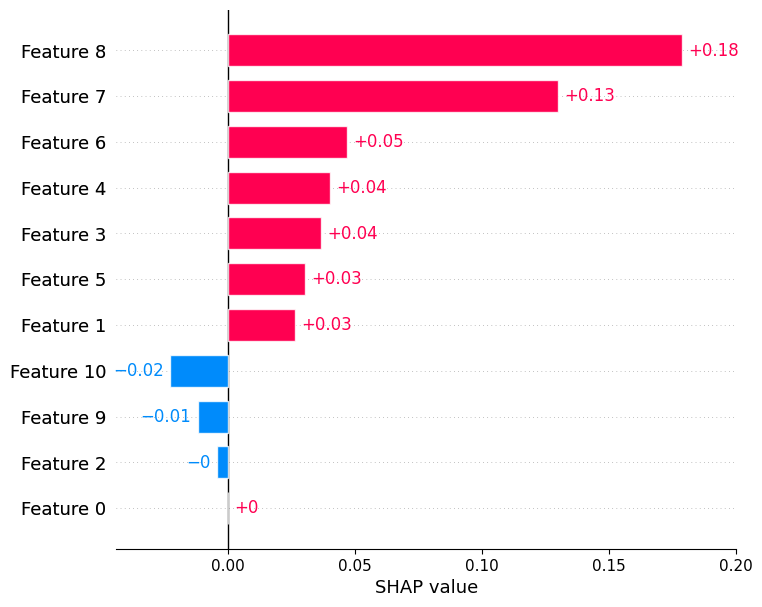

In [106]:
shap.plots.bar(shap_values[0],max_display=20)

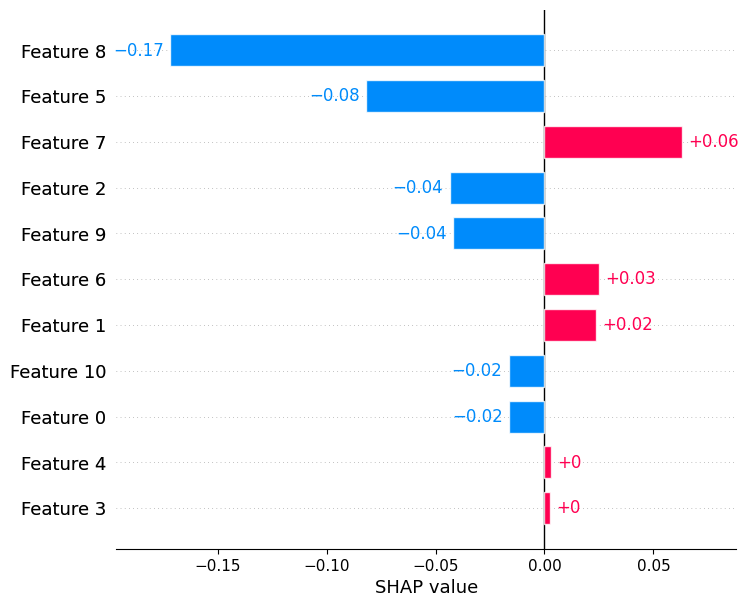

In [107]:
shap.plots.bar(shap_values[1],max_display=20)

In [144]:
type(shap_values.base_values)

numpy.ndarray

In [155]:
ann_cnn_cnn2.predict_classes(X_test_autoencoder_cnn_cnn_11_12[2].reshape(1,11))

array([[0]])

In [174]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,4.560000e+04,4.560000e+04,4.560000e+04,4.560000e+04,4.560000e+04,4.560000e+04,4.560000e+04,4.560000e+04,4.560000e+04,4.560000e+04,4.560000e+04
mean,-3.024401e-11,-7.776222e-11,-1.479163e-10,-1.126027e-10,9.130320e-11,3.474093e-11,2.980553e-11,-9.503544e-12,8.492990e-10,-8.564132e-11,-4.988058e-10
std,7.874901e-02,8.092709e-02,8.969962e-02,1.025341e-01,1.093760e-01,9.582141e-02,1.238516e-01,8.290433e-02,1.105893e-01,1.160481e-01,6.997588e-02
min,-2.403769e-01,-4.149342e-01,-3.050654e-01,-6.353976e-01,-6.576045e-01,-5.589056e-01,-5.418404e-01,-3.157431e-01,-8.073220e-01,-3.713697e-01,-2.387141e-01
25%,-4.653046e-02,-4.335600e-02,-4.763893e-02,-4.891575e-02,-5.636566e-02,-4.548597e-02,-6.470769e-02,-4.836650e-02,-4.365339e-02,-6.882825e-02,-4.003970e-02
50%,-2.128283e-02,-1.821726e-02,-2.266895e-02,-7.741117e-03,-2.146085e-02,-1.122789e-02,-3.113607e-02,-2.460663e-02,-1.423370e-02,-3.874416e-02,-1.920512e-02
75%,2.080038e-02,1.866865e-02,1.958107e-02,4.040297e-02,3.608411e-02,2.853338e-02,2.474184e-02,1.846497e-02,3.250619e-02,2.900543e-02,1.589469e-02
max,6.810775e-01,8.584084e-01,8.850548e-01,1.043659e+00,1.035070e+00,7.693141e-01,1.071473e+00,7.043621e-01,9.670070e-01,7.991886e-01,6.803907e-01


In [160]:
X_test_autoencoder_cnn_cnn_11_12[0]

array([0.52853274, 0.5133255 , 0.46109307, 0.39045468, 0.3537336 ,
       0.4880473 , 0.5183314 , 0.37611005, 0.21346839, 0.35697237,
       0.4456506 ])

In [161]:
from sklearn.preprocessing import MinMaxScaler

In [164]:
mm=MinMaxScaler()
mm.fit(X_train_autoencoder_cnn_cnn_11_12)
X_test_retrans=mm.inverse_transform(X_test_autoencoder_cnn_cnn_11_12)

In [166]:
X_test_retrans[0]

array([0.51672553, 0.48543838, 0.457089  , 0.3553487 , 0.38144119,
       0.49138086, 0.46983503, 0.38506234, 0.20303361, 0.36602366,
       0.4002673 ])

### Crossvalidation of the final classifier

In [ ]:
X_cv=np.concatenate([X_train_autoencoder_cnn_cnn_11_12,X_test_autoencoder_cnn_cnn_11_12])

In [ ]:
X_train_autoencoder_cnn_cnn_11_12.shape,X_test_autoencoder_cnn_cnn_11_12.shape

In [ ]:
y_cv=np.concatenate([y_train.values,y_test.values])
y_cv.shape

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
ann_cv = keras.Sequential([
    keras.layers.Dense(128, input_shape=(11,), activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ann_cv.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
  
for i1,(train_index , test_index) in enumerate(kf.split(X_cv)):
    print(f"Fold {i1+1}")
    X_train1 , X_test1 = X_cv[train_index,:],X_cv[test_index,:]
    y_train1 , y_test1 = y_cv[train_index] , y_cv[test_index]
     
    ann_cv.fit(X_train1,y_train1, epochs=60,validation_split=0.20)
    pred_values = ann_cv.predict(X_test1)
    cv_pred=[]
    for a in pred_values:
        if a[0]>=0.5:
            cv_pred.append(1)
        else:
            cv_pred.append(0)
        
    print("Accuracy: ",accuracy_score(cv_pred , y_test1))
    print(classification_report(cv_pred,y_test1))
    print(confusion_matrix(cv_pred,y_test1))
    print("#################################")

In [ ]:
fold1:1
    acc=0.93
    prec=0.92
    recall=0.91
    f1=0.92
fold:2
    acc=0.93
    prec=0.92
    recall=0.92
    f1=0.92
fold:3
    acc=0.93
    prec=0.95
    recall=0.91
    f1=0.93
fold:4
    acc=94
    prec=0.94
    recall=0.93
    f1=0.93
fold:5
    acc=95
    prec=0.94
    recall=0.94
    f1=0.94
    

#### showing the variation of the classifier w.r.t the bottleneck size

In [ ]:
input_dim = Input(shape = (19, 1))

for i in range(1,16):
    cnn_enc = layers.Conv1D(128, 19, activation='relu', padding='same')(input_dim)
    cnn_enc = layers.Conv1D(64, 19, activation='relu', padding='same')(cnn_enc)
    cnn_enc = layers.Conv1D(32, 19, activation='relu', padding='same')(cnn_enc)
    cnn_enc = layers.Conv1D(16, 19, activation='relu', padding='same')(cnn_enc)
    cnn_enc = layers.Flatten()(cnn_enc)

    bottleneck = Dense(i, activation='sigmoid')(cnn_enc)

    reshp= Reshape((i,1))(bottleneck)

    cnn_dec=layers.Conv1D(16, i, activation='relu',padding='same')(reshp)
    cnn_dec=layers.Conv1D(32, i, activation='relu',padding='same')(cnn_dec)
    cnn_dec=layers.Conv1D(64, i, activation='relu',padding='same')(cnn_dec)
    cnn_dec=layers.Conv1D(128, i, activation='relu',padding='same')(cnn_dec)

    dec_flat=layers.Flatten()(cnn_dec)

    # mlp=Dense(256,activation='relu')(dec_flat)
    mlp=Dense(19,activation='relu')(dec_flat)

    var_autoenc = keras.Model(input_dim, mlp)
    
    var_autoenc.compile(optimizer='adam', loss='mse',metrics=['accuracy','mae','MeanSquaredError'])
    var_autoenc.fit(X_train_selected_scaled_cnn,X_train_selected_scaled,epochs=100,validation_split=0.2,verbose=2)
    intermediate = Model(inputs=var_autoenc.input, outputs=var_autoenc.get_layer(index=6).output)
    X_train_vary = intermediate.predict(X_train_selected_scaled_cnn)
    X_test_vary = intermediate.predict(X_test_selected_scaled_cnn)
    print("#####################")
    print("Shape of train: ",X_train_vary.shape)
    print("Shape of train: ",X_test_vary.shape)
    
    ann_vary = keras.Sequential([
    keras.layers.Dense(128, input_shape=(i,), activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    ])

    ann_vary.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss="binary_crossentropy",
                  metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

    ann_vary.fit(X_train_vary, y_train, epochs=60,validation_split=0.25)

    p=ann_vary.predict(X_test_vary)
    p1=[]
    for j in p:
        if j[0]>=0.5:
            p1.append(1)
        else:
            p1.append(0)

    print(confusion_matrix(y_test,p1))
    print(classification_report(y_test,p1))

In [ ]:
#### Fix the above autoencoder and work with classifier

In [ ]:
#### Abalation study

In [ ]:
# with sigmoid activation
ann_cnn_cnn3 = keras.Sequential([
    keras.layers.Dense(128, input_shape=(11,), activation='sigmoid'),
    keras.layers.Dense(256, activation='sigmoid'),
    keras.layers.Dense(64, activation='sigmoid'),
    keras.layers.Dense(1, activation='sigmoid')
])

ann_cnn_cnn3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

ann_cnn_cnn3.fit(X_train_autoencoder_cnn_cnn_11_12, y_train, epochs=60,validation_split=0.25)

pred3=ann_cnn_cnn3.predict(X_test_autoencoder_cnn_cnn_11_12)
pred4=[]
for j in pred3:
    if j[0]>=0.5:
        pred4.append(1)
    else:
        pred4.append(0)
        
print(confusion_matrix(y_test,pred4))
print(classification_report(y_test,pred4))

In [ ]:
# with leaky activation
ann_cnn_cnn4 = keras.Sequential([
    keras.layers.Dense(128, input_shape=(11,), activation=tf.keras.layers.LeakyReLU()),
    keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU()),
    keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU()),
    keras.layers.Dense(1, activation='sigmoid')
])

ann_cnn_cnn4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

ann_cnn_cnn4.fit(X_train_autoencoder_cnn_cnn_11_12, y_train, epochs=60,validation_split=0.25)

pred4=ann_cnn_cnn4.predict(X_test_autoencoder_cnn_cnn_11_12)
pred5=[]
for j in pred4:
    if j[0]>=0.5:
        pred5.append(1)
    else:
        pred5.append(0)
        
print(confusion_matrix(y_test,pred5))
print(classification_report(y_test,pred5))

In [ ]:
# with selu activation
ann_cnn_cnn5 = keras.Sequential([
    keras.layers.Dense(128, input_shape=(11,), activation="selu"),
    keras.layers.Dense(256, activation="selu"),
    keras.layers.Dense(64, activation="selu"),
    keras.layers.Dense(1, activation='sigmoid')
])

ann_cnn_cnn5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

ann_cnn_cnn5.fit(X_train_autoencoder_cnn_cnn_11_12, y_train, epochs=60,validation_split=0.25)

pred5=ann_cnn_cnn4.predict(X_test_autoencoder_cnn_cnn_11_12)
pred6=[]
for j in pred5:
    if j[0]>=0.5:
        pred6.append(1)
    else:
        pred6.append(0)
        
print(confusion_matrix(y_test,pred6))
print(classification_report(y_test,pred6))

In [ ]:
### Tuning the classifier head

In [ ]:
from kerastuner import RandomSearch
def hyper_model(hp):
    model=keras.Sequential() # Building the ANN
    for i in range(hp.Int('num_layers',2,6)):  # ANN must have hidden layers in between 2 to 6
        model.add(layers.Dense(units=hp.Int('units_'+str(i),min_value=8,max_value=256,step=8),# In each hidden layers the no of neurons must be between 32 to 256
                              activation='relu')) # activation function used
        model.add(layers.Dense(1,activation='sigmoid'))# Since it is a regressiom problem the output neuron should be 1 and the activation function should be softmax
        model.compile(optimizer=tf.keras.optimizers.Adam(      # Using Adam as optimizer and hypertune its parameter
                      hp.Choice('learning_rate',[1e-1,1e-2, 1e-3, 1e-4])), # LR for Adam
                      loss='binary_crossentropy',
                      metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
        
    return model

In [ ]:
tuner = RandomSearch(
    hyper_model,
    objective='val_accuracy', # metric used for evaluating the ANN
    max_trials=10,
    executions_per_trial=5,
    directory='project',
    project_name='log')# there will be 10 trials and inside each trial there will be 5 execution so in total 30 trials

In [ ]:
tuner.search_space_summary()

In [ ]:
X_train_hype, X_test_hype, y_train_hype, y_test_hype =train_test_split(X_train_autoencoder_cnn_cnn_11_12,y_train,test_size=0.2,random_state=42)

In [ ]:
tuner.search(X_train_hype, y_train_hype,epochs=30,validation_data=(X_test_hype, y_test_hype))

In [ ]:
tuner.results_summary()

In [ ]:
### Plotting the AUC_ROC curves

## AutoEncoder CNN - MLP

In [ ]:
input_dim = Input(shape = (19, 1))

# cnn_enc=Sequential()
cnn_enc = layers.Conv1D(64, 19, activation='relu', padding='same')(input_dim)
cnn_enc = layers.Conv1D(32, 19, activation='relu', padding='same')(cnn_enc)
cnn_enc = layers.Conv1D(16, 19, activation='relu', padding='same')(cnn_enc)
cnn_enc = layers.Conv1D(8, 19, activation='relu', padding='same')(cnn_enc)
cnn_enc = layers.Flatten()(cnn_enc)

bottleneck = Dense(11, activation='sigmoid')(cnn_enc)

mlp=Dense(32,activation='relu')(bottleneck)
mlp=Dense(64,activation='relu')(mlp)
mlp=Dense(19,activation='relu')(mlp)

autoencoder_cnn_mlp = keras.Model(input_dim, mlp)

print(autoencoder_cnn_mlp.summary())


In [ ]:
autoencoder_cnn_mlp.compile(optimizer='adam', loss='mse',metrics=['accuracy','mae','MeanSquaredError'])

In [ ]:
autoencoder_cnn_mlp.fit(X_train_selected_scaled_cnn,X_train_selected_scaled,epochs=100,validation_split=0.2,verbose=2)

In [ ]:
plt.plot(autoencoder_cnn_mlp.history.history['accuracy'])
plt.plot(autoencoder_cnn_mlp.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
plt.plot(autoencoder_cnn_mlp.history.history['loss'])
plt.plot(autoencoder_cnn_mlp.history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
intermediate_layer_model111 = Model(inputs=autoencoder_cnn_mlp.input, outputs=autoencoder_cnn_mlp.get_layer(index=6).output)
X_train_autoencoder_cnn_mlp_11_1 = intermediate_layer_model111.predict(X_train_selected_scaled_cnn)
X_test_autoencoder_cnn_mlp_11_1 = intermediate_layer_model111.predict(X_test_selected_scaled_cnn)
print("Shape of train: ",X_train_autoencoder_cnn_mlp_11_1.shape)
print("Shape of train: ",X_test_autoencoder_cnn_mlp_11_1.shape)

In [ ]:
ann_cnn_mlp = keras.Sequential([
    keras.layers.Dense(128, input_shape=(11,), activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ann_cnn_mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

ann_cnn_mlp.fit(X_train_autoencoder_cnn_mlp_11_1, y_train, epochs=60,validation_split=0.25)

pred7=ann_cnn_mlp.predict(X_test_autoencoder_cnn_mlp_11_1)
pred71=[]
for j in pred7:
    if j[0]>=0.5:
        pred71.append(1)
    else:
        pred71.append(0)
        
print(confusion_matrix(y_test,pred71))
print(classification_report(y_test,pred71))

## Autoencoder MLP-MLP

In [ ]:
# AUTOENCODER======= 19->11->19

input_dim = Input(shape = (19, ))

mlp_mlp3 = Sequential()
mlp_mlp3.add(Dense(19,activation = 'relu',input_shape=[19]))
mlp_mlp3.add(Dense(11,activation = 'relu'))
mlp_mlp3.add(Dense(19,activation = 'relu'))

mlp_mlp3.compile(optimizer=Adam(0.001),metrics=['accuracy','mae','MeanSquaredError'],loss='mse')
print(mlp_mlp3.summary())

In [ ]:
mlp_mlp3.fit(x=X_train_selected_scaled, y=X_train_selected_scaled, epochs=100,validation_split=0.2)
plt.plot(mlp_mlp3.history.history['accuracy'])
plt.plot(mlp_mlp3.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()
intermediate_layer_model_mlp1 = Model(inputs=mlp_mlp3.input, outputs=mlp_mlp3.get_layer(index=1).output)
X_train_autoencoder_mlp_mlp_11_1 = intermediate_layer_model_mlp1.predict(X_train_selected_scaled)
X_test_autoencoder_mlp_mlp_11_1 = intermediate_layer_model_mlp1.predict(X_test_selected_scaled)
print("Shape of train: ",X_train_autoencoder_mlp_mlp_11_1.shape)
print("Shape of train: ",X_test_autoencoder_mlp_mlp_11_1.shape)

In [ ]:
ann_mlp_mlp1 = keras.Sequential([
    keras.layers.Dense(128, input_shape=(11,), activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ann_mlp_mlp1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

ann_mlp_mlp1.fit(X_train_autoencoder_mlp_mlp_11_1, y_train, epochs=60,validation_split=0.25)

pred8=ann_mlp_mlp1.predict(X_test_autoencoder_mlp_mlp_11_1)
pred81=[]
for j in pred8:
    if j[0]>=0.5:
        pred81.append(1)
    else:
        pred81.append(0)
        
print(confusion_matrix(y_test,pred81))
print(classification_report(y_test,pred81))

In [ ]:
# AUTOENCODER======= 19->15->11->15->19

input_dim = Input(shape = (19, ))

mlp_mlp5 = Sequential()
mlp_mlp5.add(Dense(19,activation = 'relu',input_shape=[19]))
mlp_mlp5.add(Dense(15,activation = 'relu'))
mlp_mlp5.add(Dense(11,activation = 'relu'))
mlp_mlp5.add(Dense(15,activation = 'relu'))
mlp_mlp5.add(Dense(19,activation = 'relu'))

mlp_mlp5.compile(optimizer=Adam(0.001),metrics=['accuracy','mae','MeanSquaredError'],loss='mse')
print(mlp_mlp5.summary())

In [ ]:
mlp_mlp5.fit(x=X_train_selected_scaled, y=X_train_selected_scaled, epochs=100,validation_split=0.2)
plt.plot(mlp_mlp5.history.history['accuracy'])
plt.plot(mlp_mlp5.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()
intermediate_layer_model_mlp2 = Model(inputs=mlp_mlp5.input, outputs=mlp_mlp5.get_layer(index=2).output)
X_train_autoencoder_mlp_mlp_11_2 = intermediate_layer_model_mlp2.predict(X_train_selected_scaled)
X_test_autoencoder_mlp_mlp_11_2 = intermediate_layer_model_mlp2.predict(X_test_selected_scaled)
print("Shape of train: ",X_train_autoencoder_mlp_mlp_11_2.shape)
print("Shape of train: ",X_test_autoencoder_mlp_mlp_11_2.shape)

In [ ]:
ann_mlp_mlp2 = keras.Sequential([
    keras.layers.Dense(128, input_shape=(11,), activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ann_mlp_mlp2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

ann_mlp_mlp2.fit(X_train_autoencoder_mlp_mlp_11_2, y_train, epochs=60,validation_split=0.25)

pred9=ann_mlp_mlp2.predict(X_test_autoencoder_mlp_mlp_11_2)
pred91=[]
for j in pred9:
    if j[0]>=0.5:
        pred91.append(1)
    else:
        pred91.append(0)
        
print(confusion_matrix(y_test,pred91))
print(classification_report(y_test,pred91))

In [ ]:
y_train = pd.Series(y, index=X_train_selected.index)
y_test=pd.Series(y,index=X_test_selected.index)

In [ ]:
X_train_selected.shape

In [ ]:
y_test.shape

In [ ]:
# CNN Encoder- CNN Decoder

def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, thresholds = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return thresholds,fpr, tpr, roc_auc


plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 14})
plt.grid()
# CNN-CNN
thresholds_cc,fpr_cc, tpr_cc, roc_auc_cc = roc_curve_and_score(y_test, pred2)
plt.plot(fpr_cc, tpr_cc, color='darkorange', lw=2,
         label='CNN-CNN={0:.3f}'.format(roc_auc_cc))
# CNN-MLP
thresholds_cm,fpr_cm, tpr_cm, roc_auc_cm = roc_curve_and_score(y_test, pred7)
plt.plot(fpr_cm, tpr_cm, color='green', lw=2,
         label='CNN-MLP={0:.3f}'.format(roc_auc_cm))
# MLP-MLP
thresholds_mm,fpr_mm, tpr_mm, roc_auc_mm = roc_curve_and_score(y_test, pred8)
plt.plot(fpr_mm, tpr_mm, color='crimson', lw=2,
         label='MLP-MLP={0:.3f}'.format(roc_auc_mm))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
y_test.shape

In [ ]:
auc_for_cnncnn=pd.concat([pd.Series(thresholds_cc),pd.Series(fpr_cc),pd.Series(tpr_cc)],axis=1)

In [ ]:
auc_for_cnncnn.columns=['thresholds','fpr','tpr']

In [ ]:
auc_for_cnncnn.head()

In [ ]:
auc_for_cnncnn.to_excel("auc_roc_comparison.xlsx")

In [ ]:
thresholding_list=[]

for thres in thresholds_cc:
    row=[]
    pred_thres=[]
    for j in pred2:
        if j[0]>=thres:
            pred_thres.append(1)
        else:
            pred_thres.append(0)
    row.append(thres)
    row.append(accuracy_score(y_test,pred_thres))
    row.append(f1_score(y_test,pred_thres))
    row.append(precision_score(y_test,pred_thres))
    row.append(recall_score(y_test,pred_thres))
    thresholding_list.append(row)

thresholding_df=pd.DataFrame(thresholding_list)
thresholding_df.columns=['Threshold','Accuracy','F1 Score','Precision','Recall']

In [ ]:
thresholding_df.head()

In [ ]:
## Sorting the dataframe by F1 Score

In [ ]:
thresholding_df.nlargest(n=20,columns='F1 Score')

In [ ]:
### classifer after hypertuned

In [ ]:
# with leaky activation
hype_ann = keras.Sequential([
    keras.layers.Dense(160, input_shape=(11,), activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

hype_ann.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

hype_ann.fit(X_train_autoencoder_cnn_cnn_11_12, y_train, epochs=60,validation_split=0.25)

pred_hype=hype_ann.predict(X_test_autoencoder_cnn_cnn_11_12)
pred_hype1=[]
for j in pred_hype:
    if j[0]>=0.5:
        pred_hype1.append(1)
    else:
        pred_hype1.append(0)
        
print(confusion_matrix(y_test,pred_hype1))
print(classification_report(y_test,pred_hype1))